# <center> **Proyecto final: Happy mushrooms** </center>

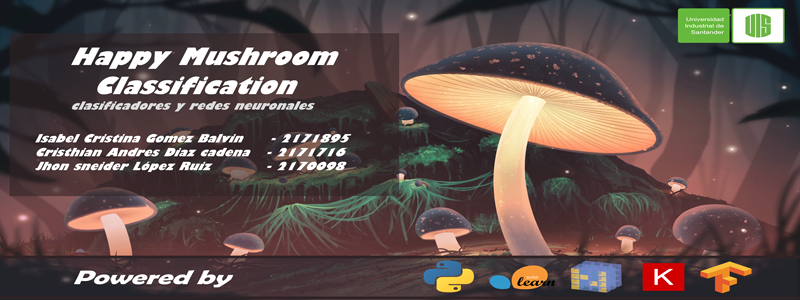

**INTRODUCCION**

La búsqueda de hongos o más conocida como "Shrooming", la cual es una práctica antigua, que siempre ha estado presente en la sociedad. Incluso hoy en día en las zonas urbanas a menudo se ve a la gente en busca de hongos.  Algunos tipos de hongos contienen psilocibina y psilocina, unas sustancias que pueden causar alucinaciones. Cuando se usan a dosis altas.
Muchos hongos de psilocibina, particularmente las especies amantes de la madera son similares a una gran variedad de otros hongos marrones pequeños, algunos de los cuales son mortales. Por lo tanto, es esencial conocer no sólo la especie que se busca, sino también las especies venenosas en la región incluyendo las que son similares 
Existen más de 200 especies de hongos venenosos. Sin embargo, muchas especies que se consideraban dudosas, e incluso venenosas, han resultado ser comestibles. En estos casos, el malentendido puede deberse a los trastornos producidos tras la ingestión de hongos en mal estado. Ya que Son pocas las especies cuya ingestión produce trastornos graves e incluso la muerte. Y además Las características que distinguen a las especies comestibles de las venenosas no siempre son tan evidentes.

El propósito de este proyecto esta enfocado en los exploradores en los biólogos que se mantienen en la naturaleza que en su mayoría cuentan con un celular, y en el caso de encontrarse con un hongo, puedan elegir unas características básicas del hongo y la aplicación pueda clasificarlo como venenoso o comestible.

* EL dataset usado en este proyecto consta de 8124 filas y 23 columnas de hongos norteamericanos de la familia Agaricus y Lepiota.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/clases IA')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/clases IA


Las librerias:

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
import scipy.stats as stats
import seaborn as sns
sns.set_theme()

2.4.1


In [ ]:
#@title **code** Load data
d = pd.read_csv("data/mushrooms.csv")
print(d.shape)
d.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


e    4208
p    3916
Name: class, dtype: int64


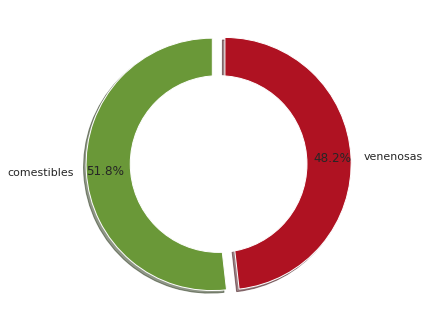

In [ ]:
print(d['class'].value_counts())

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.figure(figsize = (6,6))
#explsion
plt.pie(d['class'].value_counts(), colors = ['#6A9838','#af1222'], labels = ['comestibles', 'venenosas'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05), shadow = True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


In [ ]:
d.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#@title **code** To prepare data
from sklearn.preprocessing import LabelEncoder
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)

    return le.transform(feat)
for col in d.columns:
    d[str(col)] = label_encoded(d[str(col)])

class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [ ]:
d.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


##Analisis del dataset

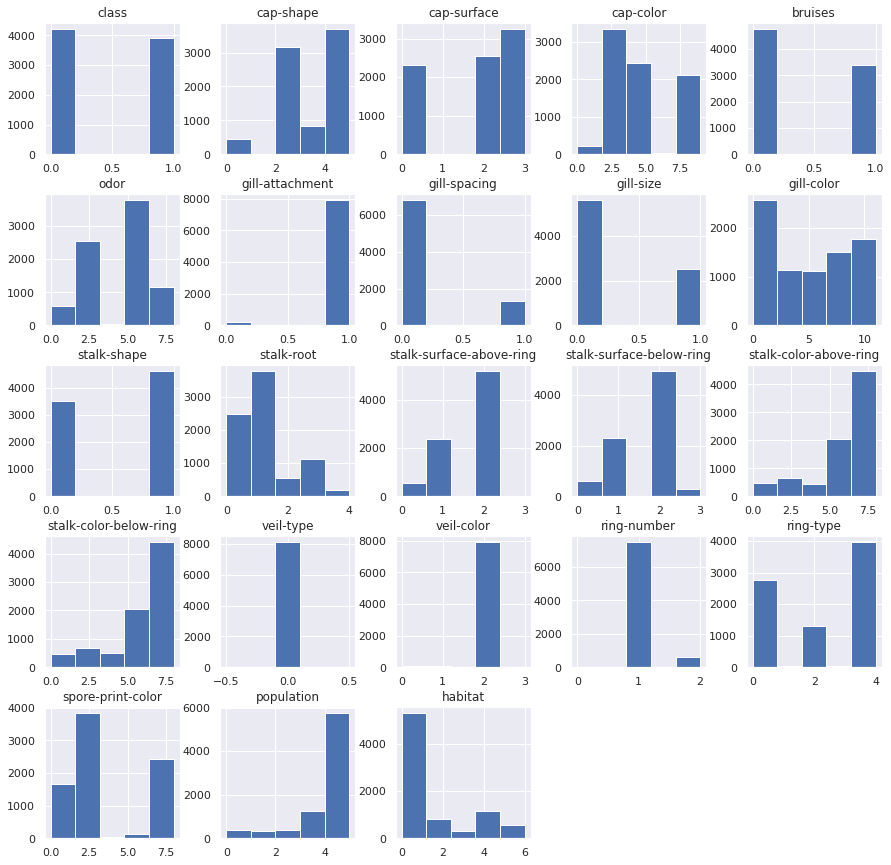

In [ ]:
#Take a View of all features to gain insights
d.hist(bins=5, figsize=(15,15));

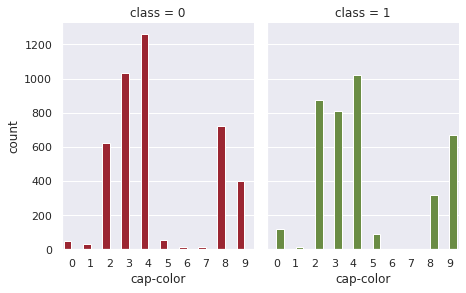

In [ ]:
#The correlation between cap color and Edible or Poisonous
sns.catplot(x="cap-color", hue="class", col="class",data=d, kind="count",height=4, aspect=.8,palette =['#af1222','#6A9838']);

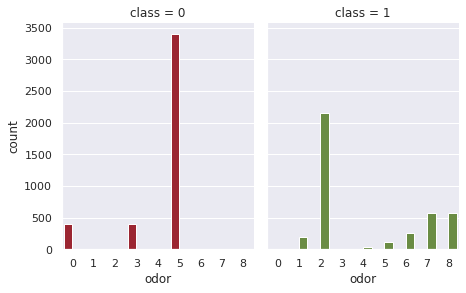

In [ ]:
sns.catplot(x="odor", hue="class", col="class",data=d, kind="count",height=4, aspect=.8,palette =['#af1222','#6A9838']);

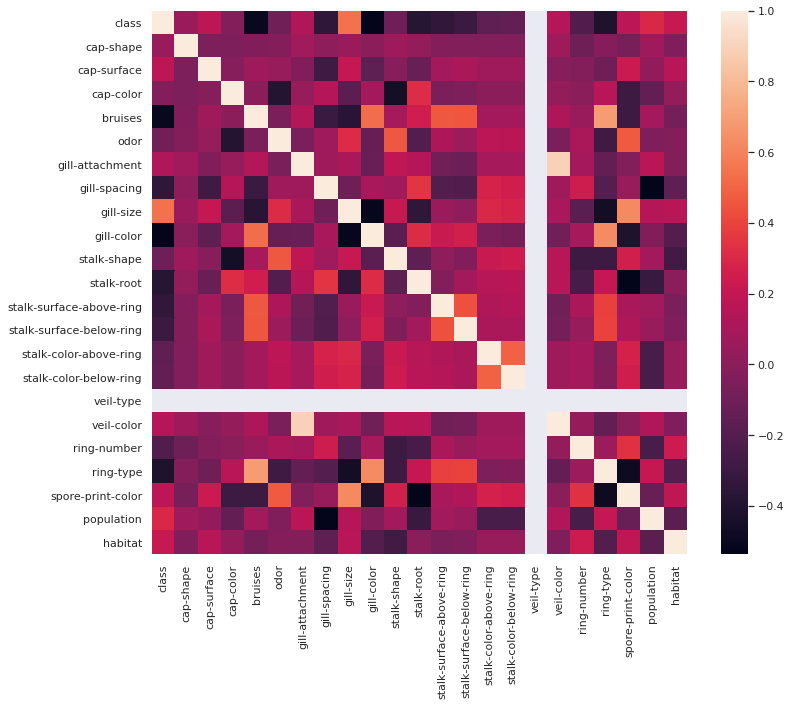

In [ ]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(d.corr())


### Separación de train y test (70% - 30%)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  RandomForestClassifier

def actualizar(data):
  X = d.values[:,1:]
  y = d.values[:,0]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  X_train=np.asarray(X_train).astype('float32')
  y_train=np.asarray(y_train).astype('float32')

  X_test=np.asarray(X_test).astype('float32')
  y_test=np.asarray(y_test).astype('float32')

  return X_train, X_test, y_train, y_test, X, y
#est.fit(X_train,y_train)


### Clasificador Randor Forest 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test, X, y = actualizar(d)

est = RandomForestClassifier()
est.fit(X_train, y_train)
y_predict = est.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1235
         1.0       1.00      1.00      1.00      1203

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



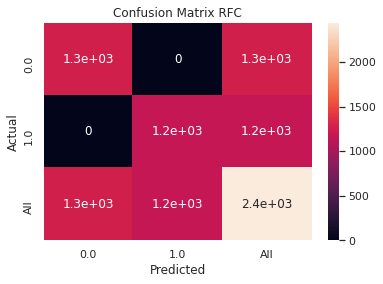

In [ ]:
confusion_matrix = pd.crosstab( y_test,y_predict, rownames=['Actual'], colnames=['Predicted'] ,margins = True)

sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion Matrix RFC')
plt.show()


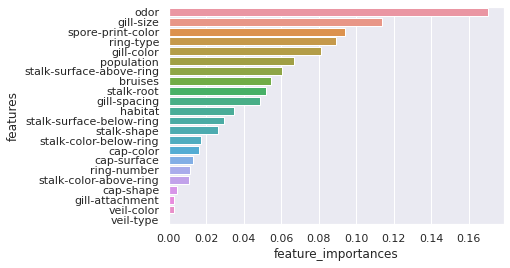

In [ ]:
X = d.drop(columns=['class'], axis=1)
fi_df = pd.DataFrame({
    "feature_importances" : est.feature_importances_,
    "features" : X.columns
})

fi_df.sort_values(by="feature_importances", ascending=False, inplace=True)

sns.barplot(x="feature_importances", y="features", data=fi_df)

In [ ]:
#Easy to see that veil-type is useless because there are no data we needs.
#podemos probar esto con un clasificador
#Split the data to y and x with x is without the class's.
for i in range(len(fi_df)):
  if fi_df.values[i,0]<0.06 :
    del d[fi_df.values[i,1]]


In [ ]:
d.head()

,class,odor,gill-size,gill-color,stalk-surface-above-ring,ring-type,spore-print-color,population
0,1,6,1,4,2,4,2,3
1,0,0,0,4,2,4,3,2
2,0,3,0,5,2,4,3,2
3,1,6,1,5,2,4,2,3
4,0,5,0,4,2,0,3,0


### Se actualizan los datos

In [ ]:
X_train, X_test, y_train, y_test, X, y = actualizar(d)
print(X.shape, y.shape)
print(X_train[0].shape, X_train.shape, y_train.shape)

(8124, 7) (8124,)
(7,) (5686, 7) (5686,)


##One hot encode

In [ ]:
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=2)
print(y_train_ohe.shape, y_test_ohe.shape)

(5686, 2) (2438, 2)


##Red neuronal

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (X_train[0].shape)),
    tf.keras.layers.Dense(2048, activation=tf.nn.elu),
    tf.keras.layers.Dense(1024, activation=tf.nn.tanh),
    tf.keras.layers.Dense(512, activation=tf.nn.elu),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.elu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),                                 
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)                 
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 7)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 2048)              16384     
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)               

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])


##Entrenando la red

In [ ]:
history = model.fit(X_train,
          y_train_ohe,
          epochs=100,
          batch_size=40,
          validation_data=(X_test,y_test_ohe))


Epoch 1/70
143/143 [==============================] - 6s 44ms/step - loss: 0.0212 - accuracy: 0.9942 - val_loss: 0.0242 - val_accuracy: 0.9914
Epoch 2/70
143/143 [==============================] - 6s 45ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0143 - val_accuracy: 0.9971
Epoch 3/70
143/143 [==============================] - 6s 42ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.1522 - val_accuracy: 0.9249
Epoch 4/70
143/143 [==============================] - 6s 43ms/step - loss: 0.0306 - accuracy: 0.9868 - val_loss: 0.0115 - val_accuracy: 0.9922
Epoch 5/70
143/143 [==============================] - 7s 46ms/step - loss: 0.0196 - accuracy: 0.9909 - val_loss: 0.0142 - val_accuracy: 0.9947
Epoch 6/70
143/143 [==============================] - 6s 43ms/step - loss: 0.0119 - accuracy: 0.9935 - val_loss: 0.0155 - val_accuracy: 0.9914
Epoch 7/70
143/143 [==============================] - 6s 42ms/step - loss: 0.0657 - accuracy: 0.9828 - val_loss: 0.1724 - val_accuracy: 0.9344

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe)

print('Test accuracy:', test_acc)

77/77 [==============================] - 1s 8ms/step - loss: 0.0295 - accuracy: 0.9832
Test accuracy: 0.9831829071044922


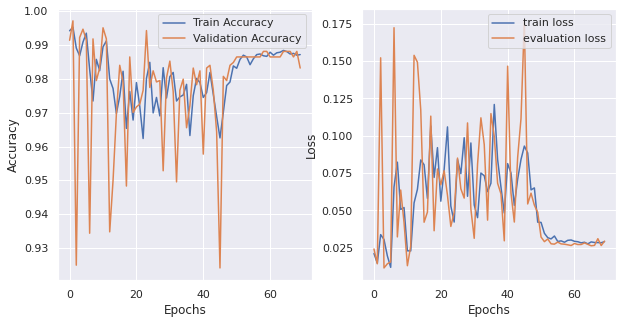

In [ ]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predi = model.predict(X_test)
pred=[]
for i in range(len(y_test)):
  pred.append(np.argmax(predi[i]))

pred=np.array(pred)

In [ ]:
type(pred)

numpy.ndarray

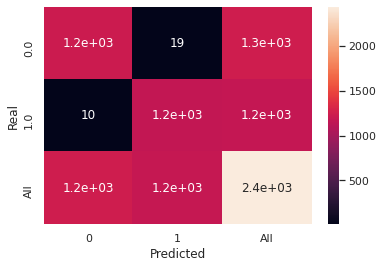

In [ ]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Real'], colnames=['Predicted'], margins = True)

sns.heatmap(confusion_matrix,annot=True)

In [ ]:
print(X_test)
type(X_test)

[[ 5.  0.  5. ...  4.  2.  4.]
 [ 5.  0.  7. ...  4.  2.  5.]
 [ 5.  1. 10. ...  0.  7.  4.]
 ...
 [ 8.  1.  0. ...  0.  7.  4.]
 [ 3.  0. 10. ...  4.  3.  3.]
 [ 3.  0.  5. ...  4.  2.  2.]]


numpy.ndarray

In [ ]:
predictions = model.predict(X_test)
h=3
ypred=np.argmax(predictions[h])
print(predictions[h])
print("valor predicho:",  np.argmax(predictions[h]), "max prob: ", np.max(predictions[h]),
      "ground truth: ", y_test[h] )

if ypred == 1:
  print('el hongo es venenoso')
if ypred == 0:
  print('el hongo es comenstible')

##Aplicacion Interactiva

In [ ]:
def interface(modelo):
  lista= []
  print("HAPPY MUSHROOM")
  print("Averigua si el hongo es venenoso o comestible, brindandonos ciertas caractieristicas sobre el .")

  print("ODOR: ")
  odor=input(" 0) almendra   1) creosota   2) sucio   3) anís   4) mohoso  5) ninguno  6) acre  7) picante  8) pescado   : ")
  lista.append(odor)

  print("COLOR DE LAS BRANQUIAS: ")
  branquias_C=input(" 0) Ante o gamuza   1) rojo   2) gris   3) chocolate   4) negro  5) naranja  6) rosa  7) verde  8) violeta \n"
  " 9) blanco   10) amarillo    : ") 
  lista.append(branquias_C)

  print("TAMAÑO DE LAS BRANQUIAS: ")
  branquias_T=input(" 0) Ancho   1) Estrecho    : ") 
  lista.append(branquias_T)

  print("COLOR DE LAS ESPORAS: ")
  esporas=input(" 0) Brillante   1) Chocolate   2) Negro   3) Cafe   4) naranja  5) Verde  6) Morado  7) Blanco  8) Amarillo    : ") 
  lista.append(esporas)

  print("POBLACION: ")
  poblacion=input(" 0) Abundante   1) Agrupado   2) Numeroso   3) Disperso   4) Varios  5) Solitario    : ") 
  lista.append(poblacion)

  print("SUPERFICIE DEL TALLO SOBRE EL ANILLO: ")
  superficie=input(" 0) Fibrosa   1) Escamosa   2) Sedosa   3) Lisa    : ") 
  lista.append(superficie)

  print("TIPO DE ANILLO: ")
  anillo=input(" 0) Evanescente   1) Abocinado   2) Grande   3) No Posee   4) Colgante    : ") 
  lista.append(anillo)
  lista=[lista]
  caracteristicas=np.asarray(lista).astype('float32')
  pred = model.predict(caracteristicas)
  ypred=np.argmax(pred)
  print("valor predicho:",  np.argmax(pred), "max prob: ", np.max(pred))

  if ypred == 1:
    print('el hongo es venenoso')
  if ypred == 0:
    print('el hongo es comenstible')

  return pred

In [ ]:

abrir=input("Quieres abrir la aplicacion? (y/n)")
if abrir == "y":
  c = interface(model)

Quieres abrir la aplicacion? (y/n)y
HAPPY MUSHROOM
Averigua si el hongo es venenoso o comestible, brindandonos ciertas caractieristicas sobre el .
ODOR: 
 0) almendra   1) creosota   2) sucio   3) anís   4) mohoso  5) ninguno  6) acre  7) picante  8) pescado   : 0
COLOR DE LAS BRANQUIAS: 
 0) Ante o gamuza   1) rojo   2) gris   3) chocolate   4) negro  5) naranja  6) rosa  7) verde  8) violeta 
 9) blanco   10) amarillo    : 0
TAMAÑO DE LAS BRANQUIAS: 
 0) Ancho   1) Estrecho    : 0
COLOR DE LAS ESPORAS: 
 0) Brillante   1) Chocolate   2) Negro   3) Cafe   4) naranja  5) Verde  6) Morado  7) Blanco  8) Amarillo    : 0
POBLACION: 
 0) Abundante   1) Agrupado   2) Numeroso   3) Disperso   4) Varios  5) Solitario    : 0
SUPERFICIE DEL TALLO SOBRE EL ANILLO: 
 0) Fibrosa   1) Escamosa   2) Sedosa   3) Lisa    : 0
TIPO DE ANILLO: 
 0) Evanescente   1) Abocinado   2) Grande   3) No Posee   4) Colgante    : 0
valor predicho: 1 max prob:  1.0
el hongo es venenoso
